SCATTERPLOT

A scatterplot is a graph that is used to display the relationship between two quantitative variables and is described by its direction, strength and form of the relationship, and unusual observations.

Direction: A positive direction means that the y-variable tends to increase as the x-variable increases (or an uphill trend). A negative direction means that the y-variable tends to decrease as the x-variable increases (or a downhill trend). Relationships between quantitative variables are said to have no direction when there is no consistent positive or negative pattern in the scatterplot.

Strength: The relationship between two quantitative variables is strong if the points fall in a “tight” pattern and weak if they are spread out.

Form: The form of a relationship is determined by the pattern of the points in the scatterplot. The most common forms are linear, curved and scattered.

Unusual observations: Unusual points do not fit the general pattern in the scatterplot. They may be outliers.

AVERAGE

The average is a statistic that represents a central or typical value of a data set. There are different measures of the center of a distribution, including the mean or arithmetic average (the sum of all values divided by the number of values) and the median (the middle value when all values are ordered). Though there are different kinds of averages (arithmetic, geometric, weighted and trimmed), when average is used in the media, it is referring to the mean or arithmetic average.

In the baseball graph, two averages are used: average WAR during contracts and average yearly salary of the contracts. They are the mean or arithmetic average.

OUTLIER

An outlier is a data point that is out of pattern by being distant from other points.

In [2]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset('iris')
df.head()
# Create Scatterplot
#sns.lmplot(x='Wingspan', y='CWDistance', data=df)

#plt.show()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


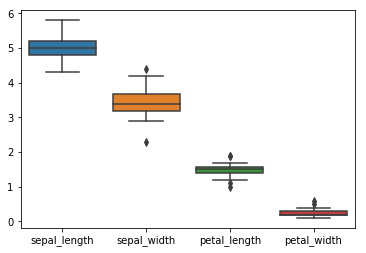

In [3]:
sns.boxplot(data=df.loc[df['species']=='setosa',['sepal_length','sepal_width','petal_length','petal_width']])

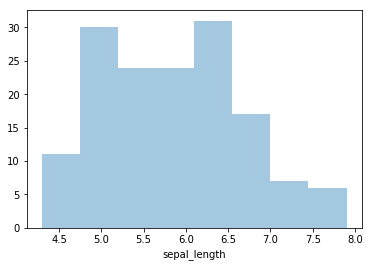

In [4]:
sns.distplot(df.sepal_length,kde=False)

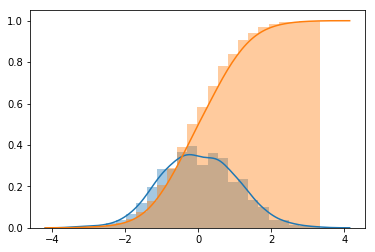

In [5]:
from scipy import stats
x = stats.norm.rvs(size=1000)
import numpy as np
fig,ax = plt.subplots()
# seaborn can directly plot PDF and CDF of a given distribution
sns.distplot(x,ax=ax)#PDF
sns.distplot(x,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))#CDF

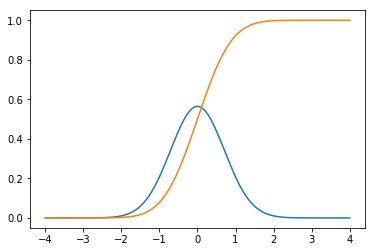

In [6]:
# or manually plot a normal dist
size = 100000
dx = 1/size
X = np.arange(-4,4,dx)
Y = np.exp(-X**2)
#normalize  the data to proper PDF
Y = Y/(dx*Y).sum()
#compute the CDF (in next cell we use cdf function)
CY = np.cumsum(Y*dx)
#plot PDF and CDF
plt.plot(X,Y)
plt.plot(X,CY)

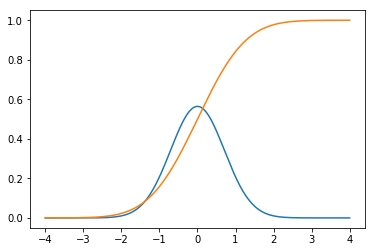

In [7]:
#CY can also be computed directly from X
CZ = stats.norm.cdf(X)
plt.plot(X,Y)
plt.plot(X,CZ)

In [8]:
da = pd.read_csv("data/nhanes_2015_2016.csv")
da = da.drop(columns=['Unnamed: 0'])

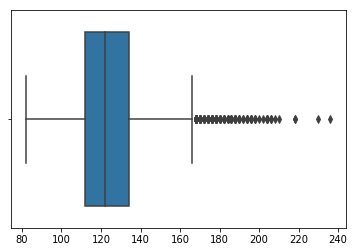

In [9]:
#bp = sns.boxplot(da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp = sns.boxplot(da.loc[:, ["BPXSY1"]])

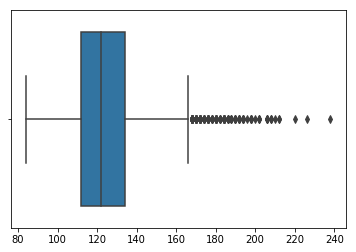

In [10]:
bp = sns.boxplot(da.loc[:, ["BPXSY2"]])

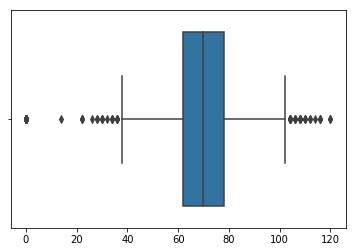

In [11]:
bp = sns.boxplot(da.loc[:, ["BPXDI1"]])

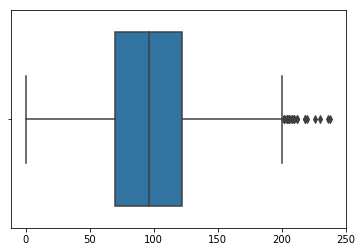

In [12]:
bp = sns.boxplot(da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])

In [13]:
da1 = da.copy()
#da.RIDAGEYR.describe()
da1["stratified"] = pd.cut(da.RIDAGEYR, [17, 30, 40, 50, 60, 70, 81])
da1[['stratified','RIDAGEYR']].head()

,stratified,RIDAGEYR
0,"(60, 70]",62
1,"(50, 60]",53
2,"(70, 81]",78
3,"(50, 60]",56
4,"(40, 50]",42


In [58]:
ser1 = da[["BPXSY1"]]
ser1 = ser1.rename(columns={'BPXSY1':'BP'})
ser1.insert(1,'type','BPXSY1')
ser2 = da[["BPXSY2"]]
ser2 = ser2.rename(columns={'BPXSY2':'BP'})
ser2.insert(1,'type','BPXSY2')
ser3 = da[["BPXDI1"]]
ser3 = ser3.rename(columns={'BPXDI1':'BP'})
ser3.insert(1,'type','BPXDI1')
ser4 = da[["BPXDI2"]]
ser4 = ser4.rename(columns={'BPXDI2':'BP'})
ser4.insert(1,'type','BPXDI2')

In [59]:
print('ser1 '+ str(ser1.shape))
print('ser2 '+ str(ser2.shape))
print('ser3 '+ str(ser3.shape))
print('ser4 '+ str(ser4.shape))

ser1 (5735, 2)
ser2 (5735, 2)
ser3 (5735, 2)
ser4 (5735, 2)


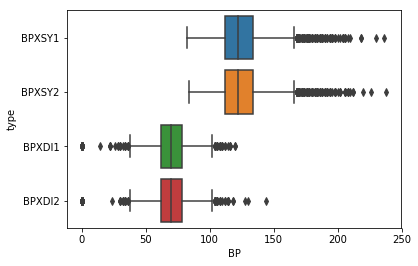

In [62]:
df = pd.concat([ser1,ser2,ser3,ser4])
sns.boxplot(x = df["BP"], y = df["type"]);

In [43]:
ser1.head()

,BPXSY1,type
0,128.0,BPXSY1
1,146.0,BPXSY1
2,138.0,BPXSY1
3,132.0,BPXSY1
4,100.0,BPXSY1
